In [12]:
import numpy as np
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt

torch.manual_seed(1)
X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
BATCH_SIZE = 1
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

LEARNING_RATE = 0.001
NUMBER_OF_EPOCHS = 200
LOG_EPOCHS = 10

loss_function = nn.MSELoss(reduction='mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [13]:
for epoch in range(NUMBER_OF_EPOCHS):
    for x_batch, y_batch in train_dl:
        # 1. Generate Predictions
        pred = model(x_batch)[:, 0]
        # 2. Calculate Loss
        loss: nn.MSELoss = loss_function(pred, y_batch)
        # 3. Compute Gradients
        loss.backward()
        # 4. Update Parameters Using Gradients
        optimizer.step()
        # 5. Reset the Gradients to Zero
        optimizer.zero_grad()
    if epoch % LOG_EPOCHS == 0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 44.3439
Epoch 10  Loss 3.5002
Epoch 20  Loss 7.8201
Epoch 30  Loss 5.6511
Epoch 40  Loss 4.1385
Epoch 50  Loss 8.6991
Epoch 60  Loss 4.5012
Epoch 70  Loss 2.9491
Epoch 80  Loss 1.3969
Epoch 90  Loss 3.2314
Epoch 100  Loss 0.2878
Epoch 110  Loss 0.7539
Epoch 120  Loss 0.6386
Epoch 130  Loss 1.5634
Epoch 140  Loss 0.0447
Epoch 150  Loss 0.1853
Epoch 160  Loss 1.1902
Epoch 170  Loss 0.0000
Epoch 180  Loss 0.3375
Epoch 190  Loss 0.0996


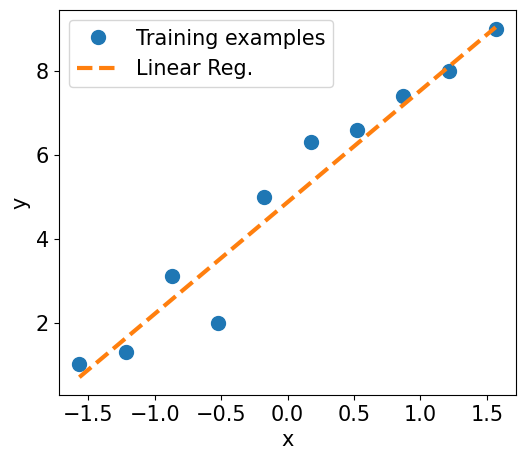

In [14]:
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('./Results/7_LinearRegression_Torch.png')

plt.show()

In [15]:
print(f'Final Parameters: {model.weight.item()}, {model.bias.item()}')

Final Parameters: 2.666882276535034, 4.8718390464782715
